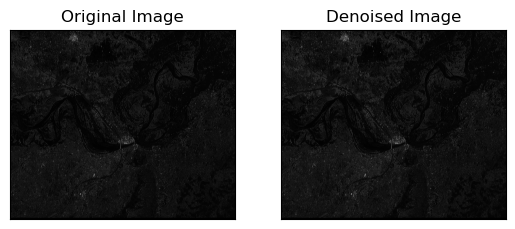

In [1]:
#Noise Reduction
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("D:\\k\\ALPSRP245160540-H2.2_UA\\HH-ALPSRP245160540-H2.2_UA.tif", 0)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0) 
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [2]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

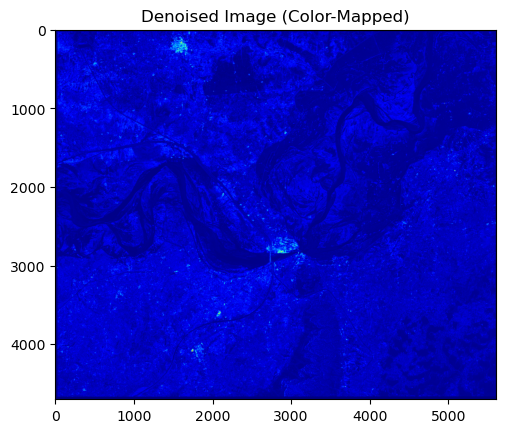

In [1]:
#Color Mapping
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("D:\\k\\ALPSRP245160540-H2.2_UA\\HH-ALPSRP245160540-H2.2_UA.tif", 0)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

In [2]:
#Mean Squared Error
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread("D:\\k\\ALPSRP245160540-H2.2_UA\\HH-ALPSRP245160540-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 8.47352066869301


In [3]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread("D:\\k\\ALPSRP245160540-H2.2_UA\\HH-ALPSRP245160540-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9227840001825003


In [4]:
#Reading Specific Pixel Value
import cv2
import numpy as np

original_image = cv2.imread(r"D:\\k\\ALPSRP245160540-H2.2_UA\\HH-ALPSRP245160540-H2.2_UA.tif", 0) 

denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 33
Denoised pixel value at (150, 150): 27


Original Image Amplitude (Magnitude):
[[3279.         2998.20903988 3789.60775264 ... 3180.79578605
  3789.60775264 2998.20903988]
 [4132.4264441  5101.50385286 6220.96184414 ... 4529.52860101
  4674.49013593 4517.3330146 ]
 [5278.1001014  1925.92220863 2013.14510498 ... 5271.41336888
  2601.50357315 4256.07073416]
 ...
 [ 964.28376114  405.9126828  3351.21344464 ... 3950.58454407
  4228.37456447 3954.25827823]
 [5278.1001014  4256.07073416 2601.50357315 ... 3251.71576102
  2013.14510498 1925.92220863]
 [4132.4264441  4517.3330146  4674.49013593 ... 4807.15050158
  6220.96184414 5101.50385286]]
Denoised Image Amplitude (Magnitude):
[[3279.         2998.20903988 3789.60775264 ... 3180.79578605
  3789.60775264 2998.20903988]
 [4132.4264441  5101.50385286 6220.96184414 ... 4529.52860101
  4674.49013593 4517.3330146 ]
 [5278.1001014  1925.92220863 2013.14510498 ... 5271.41336888
  2601.50357315 4256.07073416]
 ...
 [ 964.28376114  405.9126828  3351.21344464 ... 3950.58454407
  4228.3745644

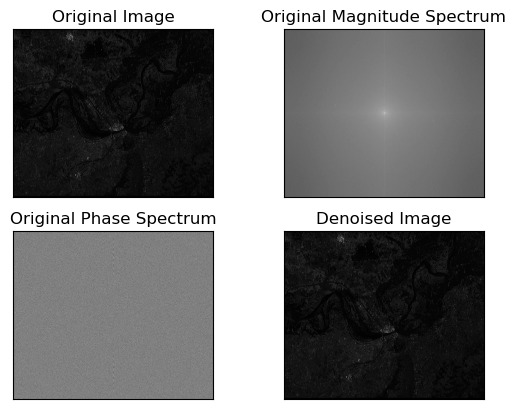

In [8]:
#Fourier Transform
import cv2
import numpy as np
import matplotlib.pyplot as plt

original_image = cv2.imread(r"D:\\k\\ALPSRP245160540-H2.2_UA\\HH-ALPSRP245160540-H2.2_UA.tif", 0)

denoised_image = cv2.imread("D:\\k\\ALPSRP245160540-H2.2_UA\\HH-ALPSRP245160540-H2.2_UA.tif", 0)

if original_image is not None and denoised_image is not None:
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)

    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")